In [41]:
from pathlib import Path
import numpy as np
from utils.mpl import nu_axes
from utils.units import basis, u
from matplotlib import pyplot as plt
fft = np.fft.rfft
fftfreq = np.fft.rfftfreq

def fft_axes(subplots=plt.subplots):
    fig, (ax_t, ax_f) = subplots(1, 2)
    fig.set_figwidth(10)
    return fig, (ax_t, ax_f)

def nu_axes_labels(axes, basis, x=(None, 1), y=(None, 1), x_in_db=False, y_in_db=False):
    xlabel, xunit = x
    ylabel, yunit = y
    set_xlabel, set_ylabel = nu_axes(
        axes, basis, xunit, yunit, x_in_db, y_in_db)
    set_xlabel(xlabel)
    set_ylabel(ylabel)
    return set_xlabel, set_ylabel

def lsparams(array):
    return len(array), np.mean(np.diff(array))

def my_fft(t, y):
    n, d = lsparams(t)
    f = np.fft.rfftfreq(n, d=d)
    halved = 1/((f == 0) + 1)
    return f, abs(np.fft.rfft(y)*halved)/len(f)

def my_bar(bar, x, y, *args, width_factor=1, **kwargs):
    return bar(x, y, width=min(np.diff(x))*width_factor, *args, **kwargs)


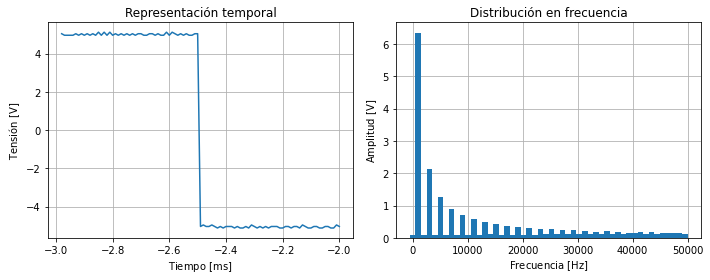

In [45]:
nu = basis()

recs = Path("../Labs/1/Recursos")
outs = Path("./out/lab1")
wave_n = 5
t, v = np.genfromtxt(recs / f"NewFile{wave_n}.csv",
                     delimiter=",", skip_header=2, unpack=True)
t, v = t*nu[u.s], v*nu[u.V]
t, v = t[:len(t)//6-1], v[:len(v)//6-1]

fig, (ax_t, ax_f) = fft_axes()

ax_t.set_title("Representación temporal")
nu_axes_labels(ax_t, nu, ("Tiempo", u.ms), ("Tensión", u.V))
ax_t.plot(t, v)
ax_t.grid()

ax_f.set_title("Distribución en frecuencia")
nu_axes_labels(ax_f, nu, ("Frecuencia", u.Hz), ("Amplitud", u.V))
f, a = my_fft(t, v)
my_bar(ax_f.bar, f, a, width_factor=1)
ax_f.grid()
ax_f.set_axisbelow(True)

fig.tight_layout()
#fig.savefig(outs/f"fft_{wave_n}.svg", bbox_inches="tight")

In [46]:
def thd(fundamental, harmonics):
    return np.sqrt(np.sum(harmonics**2))/fundamental

def my_thd(freq, ampl):
    sorted_n = freq.argsort()
    # Ordenamos las amplitudes con respecto a valor de frecuencia
    # y removemos las dos frecuencias menores, correspondientes
    # a la frecuencia 0 (DC) y la fundamental
    (adc, afund), harmonics = np.split(ampl[sorted_n], (2,))
    return thd(afund, harmonics)

curve_thd = my_thd(f, a)*100*u.percent

from sympy import Symbol, Eq
Eq(Symbol("\\mathrm{THD}"), curve_thd.n(4))


Eq(\mathrm{THD}, 48.14*percent)

In [47]:
nu.to_symb(u.kHz, 1/(t[-1]-t[-2])).n(5)

100.0*kilohertz